# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress


# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [4]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")



Number of cities in the list: 638


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

#Set unit of measure 
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    #city_url = url + "appid=" + weather_api_key + "&q=" + city
    
    city_url = f"{url}appid={weather_api_key}&q={city}&units={units}"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kapa'a
Processing Record 2 of Set 1 | iqaluit
Processing Record 3 of Set 1 | albany
Processing Record 4 of Set 1 | ushuaia
Processing Record 5 of Set 1 | nadi
Processing Record 6 of Set 1 | touros
Processing Record 7 of Set 1 | itupiranga
Processing Record 8 of Set 1 | el calafate
Processing Record 9 of Set 1 | port-aux-francais
Processing Record 10 of Set 1 | codrington
Processing Record 11 of Set 1 | sonsorol village
City not found. Skipping...
Processing Record 12 of Set 1 | waitangi
Processing Record 13 of Set 1 | harper
Processing Record 14 of Set 1 | hithadhoo
Processing Record 15 of Set 1 | blackmans bay
Processing Record 16 of Set 1 | adamstown
Processing Record 17 of Set 1 | invercargill
Processing Record 18 of Set 1 | tiksi
Processing Record 19 of Set 1 | hermanus
Processing Record 20 of Set 1 | atafu village
Processing Record 21 of Set 1 | horsham
Processing Record 22 of Set 1 | makaro

In [24]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          605
Lat           605
Lng           605
Max Temp      605
Humidity      605
Cloudiness    605
Wind Speed    605
Country       605
Date          605
dtype: int64

In [25]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,kapa'a,22.0752,-159.3190,25.99,82,24,0.45,US,1703907775
1,iqaluit,63.7506,-68.5145,-8.15,85,100,7.72,CA,1703907610
2,albany,42.6001,-73.9662,5.65,91,100,0.45,US,1703907776
3,ushuaia,-54.8000,-68.3000,7.81,87,40,1.54,AR,1703907556
4,nadi,-17.8000,177.4167,31.00,70,75,7.20,FJ,1703907776


In [26]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities_f.csv", index_label="City_ID")

In [27]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities_f.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kapa'a,22.0752,-159.3190,25.99,82,24,0.45,US,1703907775
1,iqaluit,63.7506,-68.5145,-8.15,85,100,7.72,CA,1703907610
2,albany,42.6001,-73.9662,5.65,91,100,0.45,US,1703907776
3,ushuaia,-54.8000,-68.3000,7.81,87,40,1.54,AR,1703907556
4,nadi,-17.8000,177.4167,31.00,70,75,7.20,FJ,1703907776


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

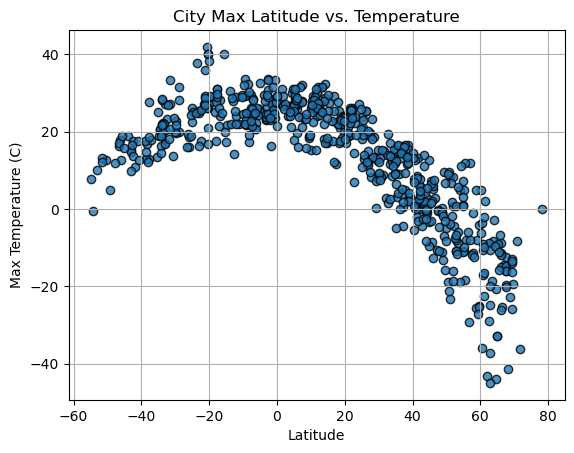

In [50]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], alpha = 0.8, marker="o", edgecolor = "black")


# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("City Max Latitude vs. Temperature")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

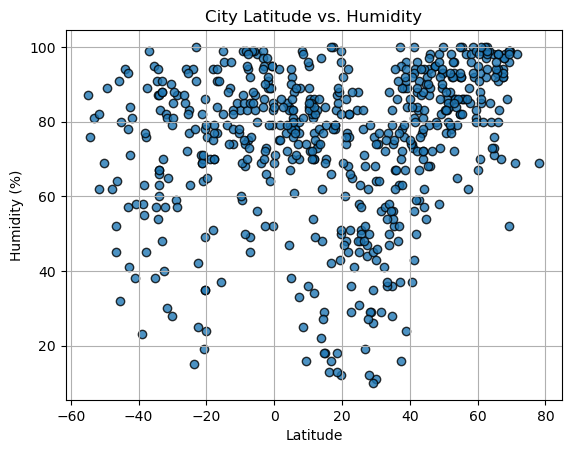

In [51]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], alpha = 0.8, marker="o", edgecolor = "black")


# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

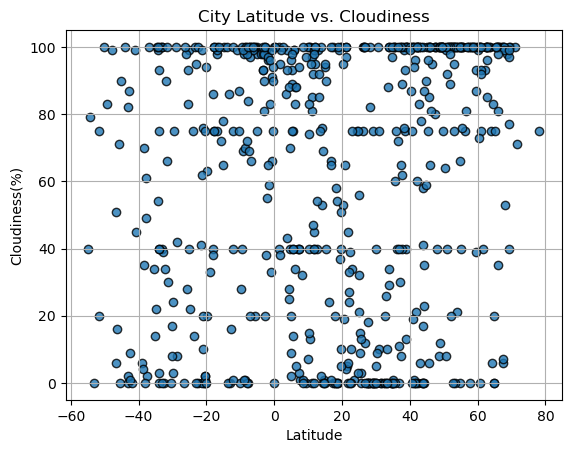

In [49]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], alpha = 0.8, marker="o", edgecolor = "black")


# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.title("City Latitude vs. Cloudiness")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

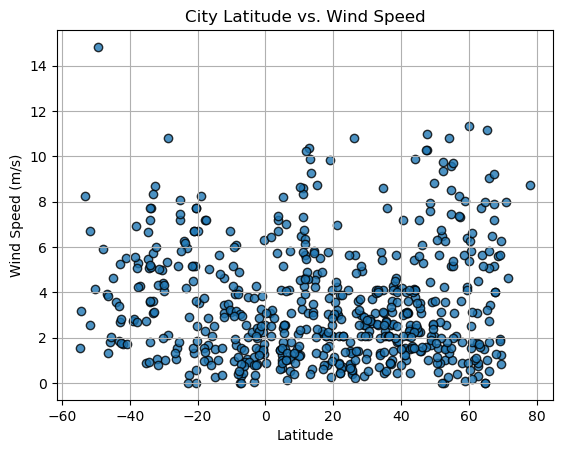

In [52]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], alpha = 0.8, marker="o", edgecolor = "black")


# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitude vs. Wind Speed")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [32]:
# Define a function to create Linear Regression plots
def linear_regression_plot (x_values, y_values, y_label, eq_pos):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq, eq_pos,fontsize=12,color="red")
    plt.xlabel("Latitude")
    plt.ylabel(f"{y_label}")
    print(f"The r value is: {rvalue}")

In [33]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0, :]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kapa'a,22.0752,-159.3190,25.99,82,24,0.45,US,1703907775
1,iqaluit,63.7506,-68.5145,-8.15,85,100,7.72,CA,1703907610
2,albany,42.6001,-73.9662,5.65,91,100,0.45,US,1703907776
11,harper,4.3750,-7.7169,26.18,84,28,1.45,LR,1703907779
16,tiksi,71.6872,128.8694,-36.20,98,71,4.64,RU,1703907781


In [34]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0, :]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,ushuaia,-54.8000,-68.3000,7.81,87,40,1.54,AR,1703907556
4,nadi,-17.8000,177.4167,31.00,70,75,7.20,FJ,1703907776
5,touros,-5.1989,-35.4608,25.85,80,98,3.80,BR,1703907776
6,itupiranga,-5.1347,-49.3267,25.18,98,100,2.03,BR,1703907777
7,el calafate,-50.3408,-72.2768,12.66,69,100,4.13,AR,1703907648


###  Temperature vs. Latitude Linear Regression Plot

The r value is: -0.8841563216325459


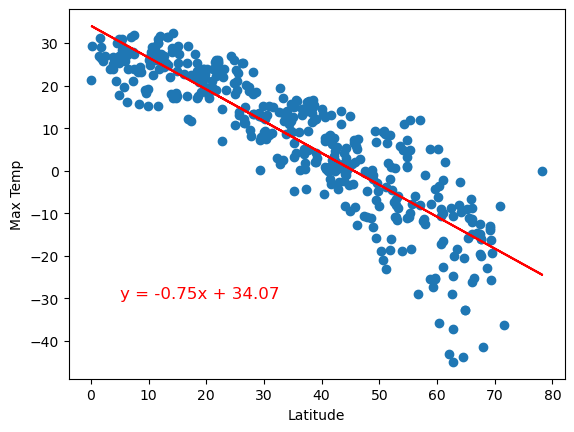

In [36]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
linear_regression_plot(x_values, y_values, "Max Temp", (5, -30))

The r value is: 0.5977266176986648


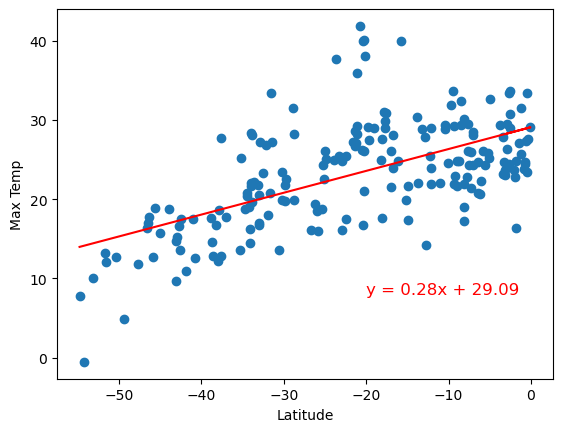

In [38]:
# Linear regression on Southern Hemisphere
x_axis = southern_hemi_df["Lat"]
y_axis = southern_hemi_df["Max Temp"]
linear_regression_plot(x_axis, y_axis, "Max Temp", (-20, 8))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

The linear relationship is modelling max temperature of a city with its latitude. 

Northern hemisphere r value = -0.88, which indicates there is a strong negative relationship between
temperature and latitude. As latitude increases temperature decreases 

Southern hemisphere r vaue = 0.59, which indicates a strong positive relationship between temperature and latitude. As latitude increases temperature increases. 

### Humidity vs. Latitude Linear Regression Plot

The r value is: 0.35281448926306275


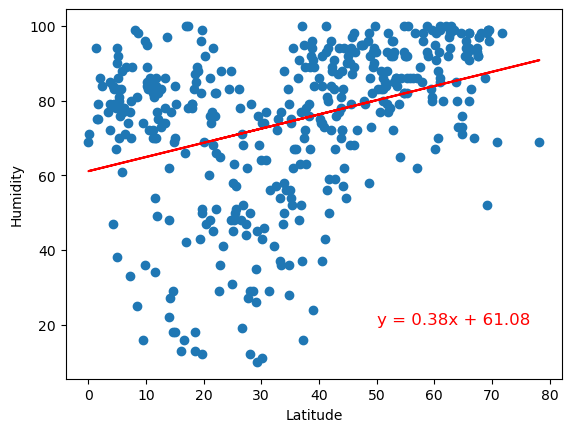

In [39]:
# Northern Hemisphere
x_axis = northern_hemi_df["Lat"]
y_axis = northern_hemi_df["Humidity"]
linear_regression_plot(x_axis, y_axis, "Humidity", (50, 20))

The r value is: 0.2487108589048496


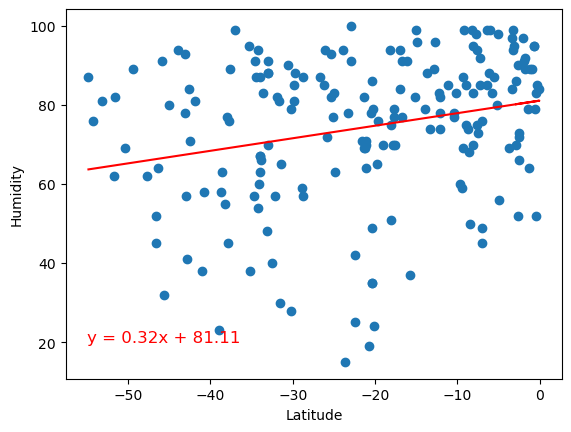

In [40]:
# Southern Hemisphere
x_axis = southern_hemi_df["Lat"]
y_axis = southern_hemi_df["Humidity"]
linear_regression_plot(x_axis, y_axis, "Humidity", (-55, 20))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

The linear relationship is modelling humidity of a city with its latitude.  

Northern hemisphere r value = 0.35, which indicates there is a weak positive relationship between
humitity and latitude. As latitude increases humidity increases

Southern hemisphere r vaue = 0.24, which indicates a weak positive relationship between temperature and humidity. As latitude increases humidity increases.

### Cloudiness vs. Latitude Linear Regression Plot

The r value is: 0.2548104283936071


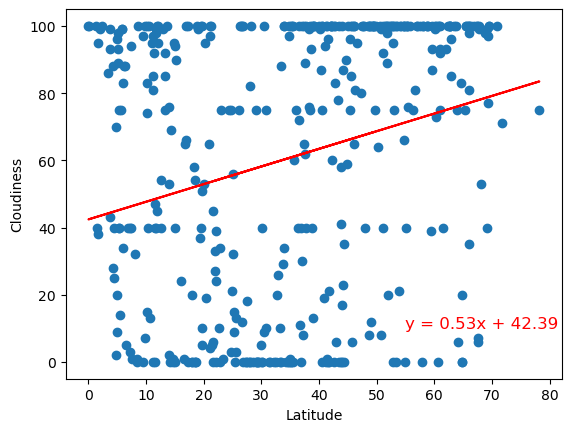

In [41]:
# Northern Hemisphere
x_axis = northern_hemi_df["Lat"]
y_axis = northern_hemi_df["Cloudiness"]
linear_regression_plot(x_axis, y_axis, "Cloudiness", (55, 10))

The r value is: 0.28249138626189535


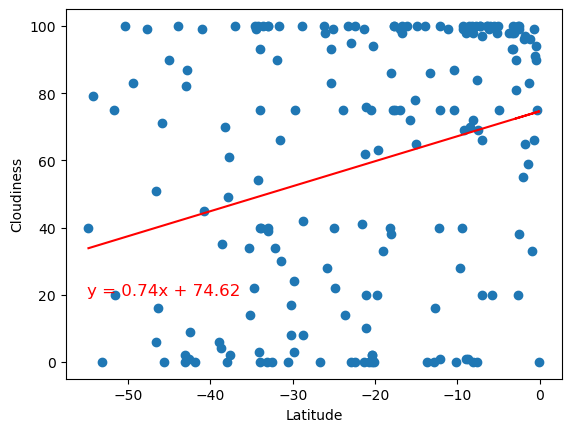

In [42]:
# Southern Hemisphere
x_axis = southern_hemi_df["Lat"]
y_axis = southern_hemi_df["Cloudiness"]
linear_regression_plot(x_axis, y_axis, "Cloudiness", (-55, 20))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

The linear relationship is modelling cloudiness of a city with its latitude.   

Northern hemisphere r value = 0.25, which indicates there is a weak positive relationship between
cloudiness and latitude. As latitude increases cloudiness increases

Southern hemisphere r vaue = 0.24, which indicates a weak positive relationship between cloudiness  and latitude. As latitude increases cloudiness increases.

### Wind Speed vs. Latitude Linear Regression Plot

The r value is: 0.10360215688251377


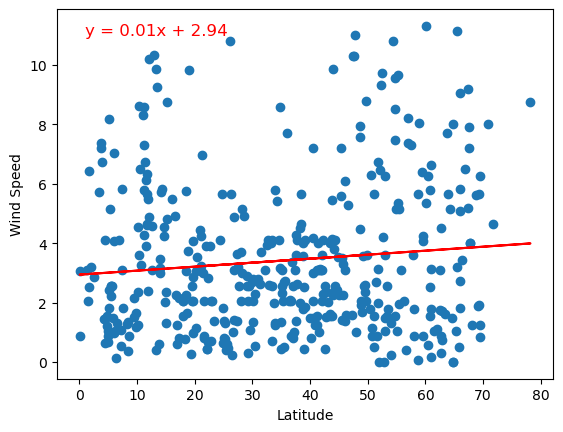

In [47]:
# Northern Hemisphere
x_axis = northern_hemi_df["Lat"]
y_axis = northern_hemi_df["Wind Speed"]
linear_regression_plot(x_axis, y_axis, "Wind Speed", (1, 11))

The r value is: -0.3434509300355326


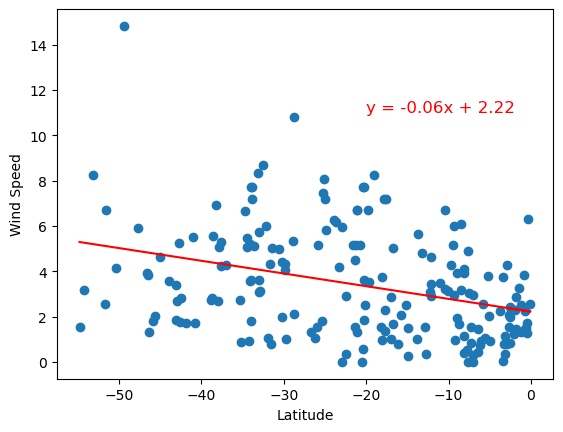

In [48]:
# Southern Hemisphere
x_axis = southern_hemi_df["Lat"]
y_axis = southern_hemi_df["Wind Speed"]
linear_regression_plot(x_axis, y_axis, "Wind Speed", (-20, 11))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

The linear relationship is modelling the wind speed of a city with its latitude.   

Northern hemisphere r value = 0.10, which indicates there is a weak positive relationship between
wind speed and latitude. As latitude increases wind speed increases

Southern hemisphere r vaue = -0.34, which indicates a weak negative relationship between wind speed  and latitude. As latitude increases wind speed decreases.